# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.


# 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
Explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

* As I near the completion of my Bachelor of Science in Data Analytics, choosing the right career path feels both exciting and overwhelming due to the vast number of specialization options. From Data Science and Machine Learning to Big Data Engineering and Business Intelligence, the possibilities are extensive. To help guide my decision, I’ve gathered two datasets containing information about various Data Analytics roles, including salary, required experience, employment type, and the prevalence of remote work. By analyzing and comparing these datasets, I aim to identify roles that align with my career goals, desired income, and preferred work environment. This project offers a valuable opportunity to make data-driven decisions about my future specialization.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method, including the names and significance of the variables in the dataset. 

## **Dataset 1**

This dataset was chosen because it provides detailed insights into various job categories within the Data Analytics field, including roles like Data Engineering, Data Science, and Data Architecture. Additionally, it offers information on work settings, such as whether positions are remote, hybrid, or in-person, which is a crucial factor for me as a prospective job seeker aiming for a remote role. By analyzing this dataset, I hope to narrow down career options based on my preferences, including flexibility in work location, and identify trends that align with my professional goals.

**Type:** The dataset is provided as a CSV file contained within a ZIP archive.

**Method:** The dataset was downloaded manually, unzipped, and loaded into a Pandas DataFrame using Python. This approach allows for efficient data manipulation and analysis.

**Dataset variables:**


* work_year: The year of data collection

* job_title: The title of the job role 

* job_category: The category or specialization of the job 

* salary_currency: The currency in which the salary is paid 

* salary: The salary offered for the role in the specified currency

* salary_in_usd: The salary converted to USD for standard comparison

* employee_residence: The country of residence of the employee

* experience_level: The level of experience required

* employment_type: Type of employment 

* work_setting: The nature of the work environment 

* company_location: The location of the company's headquarters

* company_size: The size of the company, typically categorized as Small (S), Medium (M), or Large (L)

In [272]:
import pandas as pd #for loading CSV into a dataframe
import zipfile
import os

In [273]:
# Unzip the zip file in read mode using a context manager
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    # Extract all the contents into a specific folder
    zip_ref.extractall("jobs_in_data")

# load the CSV file into a Pandas DataFrame
csv_file_path = os.path.join("jobs_in_data", "jobs_in_data.csv")

# Check if the file exists before loading it
if os.path.exists(csv_file_path):
    data = pd.read_csv(csv_file_path)
    print("CSV file loaded successfully!")
    print(data.head())  # Show the first few rows of the DataFrame
else:
    print("CSV file not found inside the extracted folder.")

CSV file loaded successfully!
   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0    

#### Summary of Code

The provided code unzips the archive.zip file, extracts its contents into a specified folder, and loads the jobs_in_data.csv file into a Pandas DataFrame. It includes checks to ensure the file exists before attempting to load it, and it displays the first few rows of the DataFrame to confirm successful loading. This setup allows for efficient data handling and provides a clear starting point for analysis.

## Dataset 2

This dataset was chosen to complement the first dataset by providing an additional source of information for comparison and validation. By using data from a different platform, I aim to minimize potential biases and ensure a broader perspective on trends in the Data Analytics job market. This dataset includes critical details such as job titles, salaries, employment types (full-time vs. part-time), and remote work ratios. These variables will allow for an in-depth analysis of various job roles and work environments, further aiding my decision-making process.

**Type:** The dataset is provided as a CSV file

**Method:** The dataset was programmatically downloaded using an HTTP GET request with Python's requests library. After downloading, the CSV file was saved locally and loaded into a Pandas DataFrame for analysis.

**Dataset variables:**


* Unnamed: 0: Index column

* work_year: Year of data collection

* experience_level: Experience level required 

* employment_type: Type of employment 

* job_title: Specific job title 

* salary: Salary offered in the specified currency

* salary_currency: Currency in which the salary is paid 

* salary_in_usd: Salary converted to USD for standardization.

* employee_residence: Country where the employee resides

* remote_ratio: Percentage of remote work allowed (0 for fully in-person, 50 for hybrid, 100 for fully remote)
* company_location: Country where the company's headquarters are located.

* company_size: Size of the company categorized as Small (S), Medium (M), or Large (L)

In [274]:
import requests

In [275]:
#Make directory
folder_name = 'ds_jobs'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [276]:
datascience_jobs_url = ['https://raw.githubusercontent.com/NatoshaM/DataSets_for_DataScience/main/ds_salaries.csv']

In [277]:
for url in datascience_jobs_url:
    # Create an HTTP GET request for ds_jobs
    response = requests.get(url)
    # Raise an exception if we made a request resulting in an error
    response.raise_for_status()
    # Define the filepath by incorporating the folder_name and the last part of the url
    file_path = os.path.join(folder_name, 'ds_salaries.csv')
    print(f"Downloading to: {file_path}")
    # Writing in binary mode
    with open(file_path, mode='wb') as file:
        file.write(response.content)

print("Download completed!")

Download completed!


In [278]:
os.listdir(folder_name)

['ds_salaries.csv']

In [279]:
#check if the file was downloaded
if os.path.exists(file_path):
    print(f"File downloaded successfully to {file_path}")
    
    # Load the CSV file to check if it has data
    try:
        df = pd.read_csv(file_path)
        print("First few rows of the dataset:")
        print(df.head())  # Display the first few rows
    except Exception as e:
        print(f"Error loading the file: {e}")
else:
    print("Download failed or file does not exist.")

File downloaded successfully to ds_jobs/ds_salaries.csv
First few rows of the dataset:
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0            

## Summary of Code

The provided code downloads the dataset from a given URL using an HTTP GET request, ensuring the file is saved locally under the directory ds_jobs. After verifying the download, the CSV file is loaded into a Pandas DataFrame for further analysis. The code includes error handling to ensure that any issues during file loading or data extraction are reported. It also displays the first few rows of the dataset to confirm successful loading.

# 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.




## Distinction between quality and tidiness issues 
    
    
**Quality Issues:** 
    
   * Affect the accuracy, completeness, validity, or consistency of data values.
    
**Tidiness Issues:** 

   * Relate to the structure of the data such as columns not representing variables, data spread across multiple tables.
 


## Plan for Assessing data

**1. Start with One Dataset** 
    
   * Begin with the first dataset Jobs_in_data. This helps avoid confusion and ensures a focused assessment. 
   
   * Apply the Same steps to the second dataset ds_salaries after completing the first one. 
    
**2. Review Data Quality Attributes for Each Dataset** 
    
   * Completeness: Check for missing or null values in critical columns.
    
   * Validity: Ensure that the data adheres to predefined formats or value ranges.

   * Accuracy: Spot outliers or unrealistic values.

   * Consistency: Verify that similar data points are uniform across the dataset.

   * Uniqueness: Ensure there are no duplicate rows or redundant information.
    
 **3. Identify and Describe Data and Tidiness Issues** 

   * Use methods like df.head(), df.describe(), and df.info() to visually and programmatically assess the dataset.

   * Identify two data quality issues and two tidiness issues (redundant columns, improper data types, or unpivoted data).
 
 **4.  Document Findings** 
 
   * Include comments in your code for readability.
     
   * Justify why a particular method (like df.describe()) was used to reveal specific issues.

## Quality Issues for Dataset 1:

In [280]:
#Inspecting the dataframe visually

#Load the dataset
jobs_data = pd.read_csv(csv_file_path)

# Inspect the first few rows
print("First few rows of the dataset:")
print(jobs_data.head())

First few rows of the dataset:
   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0   

In [281]:
# Get a summary of the dataset's structure and data types
print("\nDataset Info:")
print(jobs_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None


In [282]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(jobs_data.describe())


Summary Statistics:
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   63608.835387   63177.372024
min    2020.000000   14000.000000   15000.000000
25%    2023.000000  105200.000000  105700.000000
50%    2023.000000  143860.000000  143000.000000
75%    2023.000000  187000.000000  186723.000000
max    2023.000000  450000.000000  450000.000000


In [283]:
# Check for missing values
print("\nMissing Values Per Column:")
print(jobs_data.isnull().sum())


Missing Values Per Column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [284]:
# Unique values for categorical columns

print("\nUnique Values in Categorical Columns:")
categorical_columns = ['job_title', 'job_category', 'salary_currency', 'employee_residence', 
                       'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']
for column in categorical_columns:
    print(f"{column}: {jobs_data[column].nunique()} unique values")


Unique Values in Categorical Columns:
job_title: 125 unique values
job_category: 10 unique values
salary_currency: 11 unique values
employee_residence: 83 unique values
experience_level: 4 unique values
employment_type: 4 unique values
work_setting: 3 unique values
company_location: 70 unique values
company_size: 3 unique values



Visualizing potential outliers in salary columns:


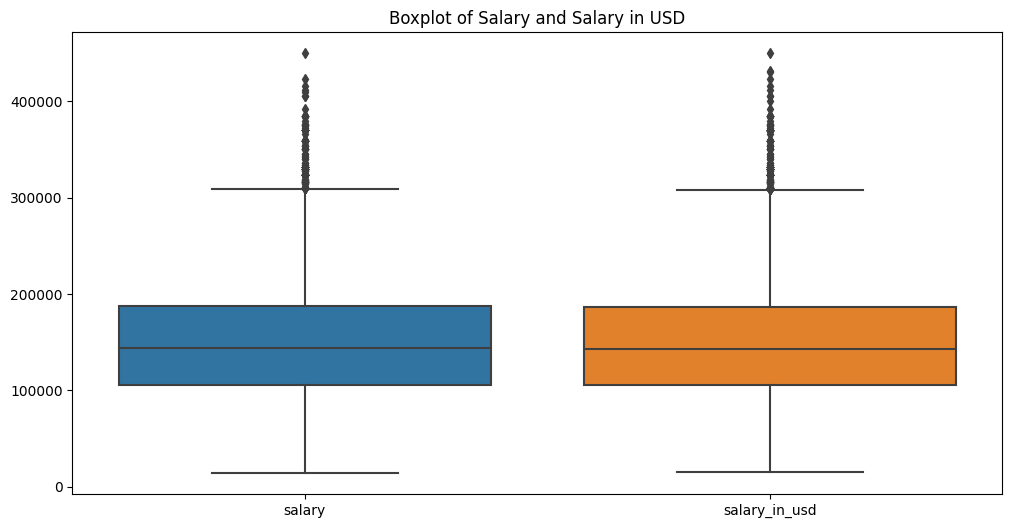

In [285]:
# Identify potential outliers in salary and salary_in_usd
import seaborn as sns
import matplotlib.pyplot as plt

print("\nVisualizing potential outliers in salary columns:")
plt.figure(figsize=(12, 6))
sns.boxplot(data=jobs_data[['salary', 'salary_in_usd']])
plt.title('Boxplot of Salary and Salary in USD')
plt.show()

In [286]:
# Cross-check work_setting for consistency
print("\nUnique values in work_setting:")
print(jobs_data['work_setting'].value_counts())


Unique values in work_setting:
work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64


In [287]:
# Check for duplicate rows
print("\nDuplicate Rows:")
duplicates = jobs_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Duplicate Rows:
Number of duplicate rows: 4014


**Dataset 1, Quality Issue and justification:**


1. Outliers in Salary Columns   
    * Issue: Both Salary and Salary_in_usd have extreme outliers above 300,000 while most data points are between 100,000 and 200,000
    * Justification:
        * Outliers can skew the mean and other statistical measures, affecting insights like typical salary ranges.
        * These data points could indicate either high-paying niche roles or potential data entry errors (violating accuracy).   
2. Imbalance in work_setting Values
    * Issue: The work_setting column has an uneven distribution
            In-person: 5730
            Remote: 3434
            Hybrid: 191
    * Justification: Although not inherently wrong, this distribution might suggest incompleteness or inconsistent reporting for the Hybrid category.
    * Companies offering hybrid work might not be accurately classified or underreported    
3. Potential Issue in job_category
    * Issue: 10 unique values in job_category seem reasonable, but further exploration is needed to confirm validity.
    * Misclassification could violate validity. For example, "Data Science" and "Machine Learning" roles might overlap or be miscategorized.    
4. Duplicate Rows
    * Issue: The dataset contains 4014 duplicate rows
    * Justifaction: 
        * Duplicate rows inflate the dataset size unnecessarily and can bias any analysis, especially when calculating aggregated metrics like average or totals.
        * The violate the uniqueness attribute of data quality. 

## Quality Issue for Dataset 2:

In [288]:
# Load dataset into separate DataFrame
data_science_jobs = pd.read_csv('ds_jobs/ds_salaries.csv')

#verify Dataset content to confirm working with right dataset
print("First few rows of the Data Science Jobs dataset:")
data_science_jobs.head()

First few rows of the Data Science Jobs dataset:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [289]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for duplicated values
duplicated_rows = data_science_jobs[data_science_jobs.duplicated()]

if not duplicated_rows.empty:
    # Visualizing duplicates if they exist
    plt.figure(figsize=(8, 6))
    sns.countplot(data=duplicated_rows, x='job_title')
    plt.title("Duplicate Job Titles in Data Science Jobs Dataset")
    plt.xlabel("Job Title")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


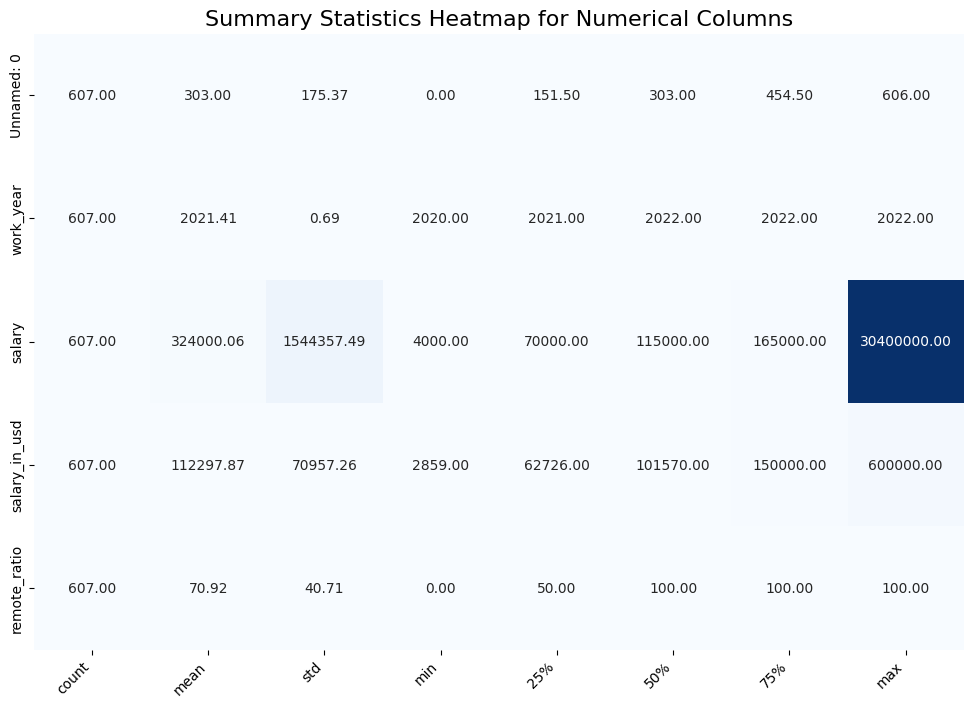

In [290]:
# Import necessary library
import numpy as np

# Visual summary of DataFrame using .describe() for numerical columns only
describe_summary_numeric = data_science_jobs.describe(include=[np.number]).transpose()

# Plot heatmap of summary statistics for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(describe_summary_numeric, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Summary Statistics Heatmap for Numerical Columns', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

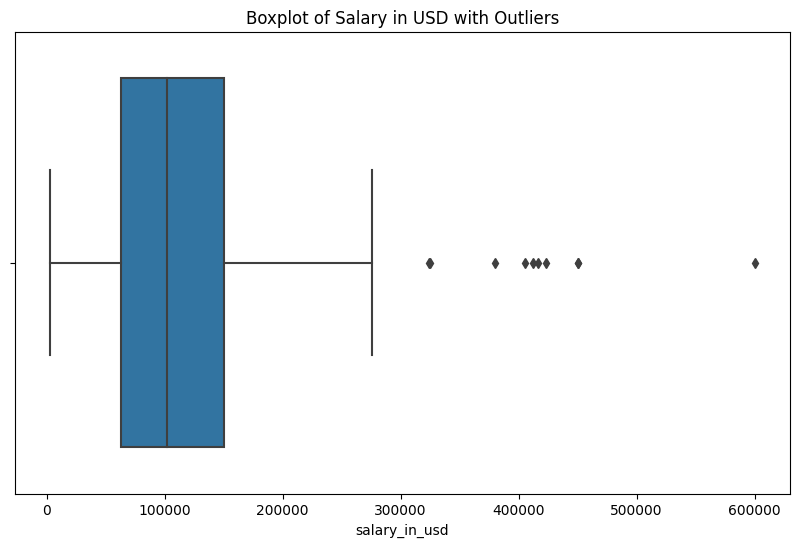

In [291]:
# Boxplot to visualize outliers in salary_in_usd
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_science_jobs, x='salary_in_usd')
plt.title('Boxplot of Salary in USD with Outliers')
plt.show()

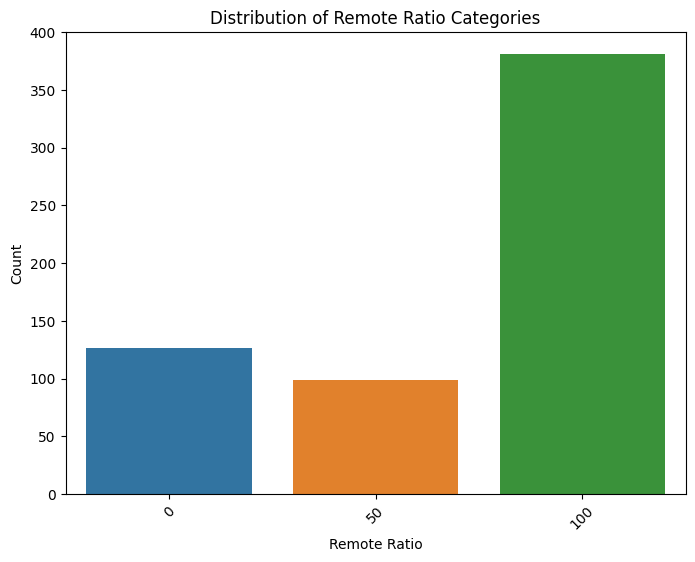

In [292]:
# Create a bar plot to visualize the distribution of remote_ratio categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_science_jobs, x='remote_ratio')
plt.title('Distribution of Remote Ratio Categories')
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [293]:
# Example for checking missing values
print(data_science_jobs.isnull().sum())

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [294]:
# Checking if salary_in_usd contains valid values (positive numbers)
invalid_salary = data_science_jobs[data_science_jobs['salary_in_usd'] <= 0]
print("Invalid salary_in_usd values (<= 0):")
print(invalid_salary)

Invalid salary_in_usd values (<= 0):
Empty DataFrame
Columns: [Unnamed: 0, work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [295]:
# Checking if company_location and employee_residence are consistent
inconsistent_locations = df[df['company_location'] != df['employee_residence']]
print(f"Rows with inconsistent company_location and employee_residence:")
print(inconsistent_locations[['company_location', 'employee_residence']])

Rows with inconsistent company_location and employee_residence:
    company_location employee_residence
17                GB                 PL
19                US                 PT
32                US                 GR
40                US                 PH
53                DE                 PK
54                US                 RU
61                US                 ES
70                LU                 FR
73                US                 IN
82                CA                 GB
84                PL                 IT
89                US                 BG
90                DK                 GR
96                US                 BR
99                US                 DE
102               US                 HU
113               US                 PK
120               RO                 ES
132               US                 VN
149               US                 BR
156               IL                 SG
179               US                 IN
182             

In [296]:
# Check the column names 
print(data_science_jobs.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [297]:
print(data_science_jobs.dtypes)

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


**Dataset 2, Quality Issue and justification:**

1. Outliers in Salary Columns
    * Issue: The salary_in_usd column has extreme outliers, with some salary values exceeding 300,000, while most data points fall between 50,000 and 150,000. 
    * Justification: Outliers can distort the analysis of typical salary trends. These extreme values could represent rare high-paying roles or potential data entry errors, violating accuracy and affecting meaningful interpretation.
2. Inconsistent Company Loacation and Employee Residence:
    * Issue:Several rows show mismatched values in company_location and employee_residence. However this could be due to the employee working remote and living elseware.
    * Justification: These inconsistencies could violate the consistency attribute of data quality, as company and residence location should ideally match if they are to reflect accurate employment data. These discrepancies need to be examined further for validity, especially if they are not intended to indicate remote work.
3. Missing Data
    * Issue: There are no missing values in the dataset as indicated by the check for null values.
    * Justification: While this is a positive outcome, any future additions of data should be monitored for completeness to ensure that missing values do not affect analysis.
4. Negative or Zero Values in salary_in_usd:
    * Issue: The salary_in_usd column contains no negative or zero values, which is a good indicator of valid salary data.
    * Justification: This confirms the accuracy of salary values for further analysis, as negative or zero salaries would indicate errors.
5. Duplicate Rows:
    * Issue: No duplicate rows were found in the dataset.
    * Justification: Duplicate rows can inflate the dataset size unnecessarily and skew aggregated metrics. Since no duplicates were found, we maintain the uniqueness of the data.
6. Imbalance in Remote Ratio Categories
    * Issue:The remote_ratio column shows a significant imbalance in the distribution of job entries. The majority of entries fall under 100 (approximately 375 entries), while the 0 (about 125) and 50 (about 100) categories are underrepresented.
    * Justification:This imbalance could indicate incomplete or inconsistent reporting of remote work percentages. The predominance of 100 may reflect roles that are entirely remote, while 0 and 50 categories might be underreported or inaccurately classified. This could violate the validity of the dataset if the remote_ratio is not consistently captured across all job listings, leading to misleading insights about the prevalence of remote work in the data.                                                                                
          

## Tidiness Issue Dataset 1:



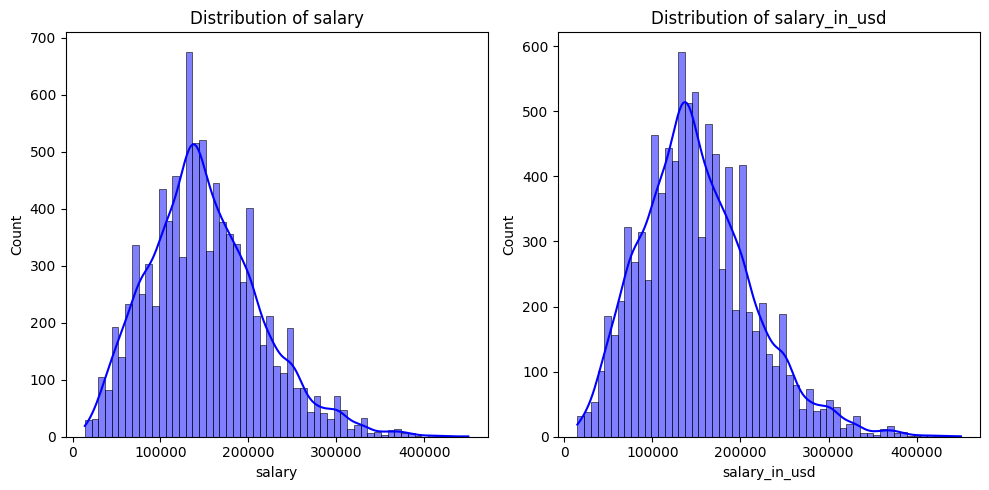

In [298]:
#Inspecting the dataframe visually

# Visualize the distribution of each numeric variable (salary, salary_in_usd)
numeric_columns = ['salary', 'salary_in_usd']
plt.figure(figsize=(10, 5))
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 2, idx)
    sns.histplot(jobs_data[col], kde=True, color="blue")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [299]:
# Checking if columns like 'company_location' are messy and could be split
print("\nUnique values in 'company_location':")
print(jobs_data['company_location'].value_counts())


Unique values in 'company_location':
company_location
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: count, Length: 70, dtype: int64


In [300]:
# visually inspect the first few rows to see how combined variables appear
print("\nFirst few rows of the dataset:")
print(jobs_data.head())


First few rows of the dataset:
   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0  

In [301]:
# Inspecting the dataframe programmatically
# Check for multiple variables encoded in a single column
for col in jobs_data.columns:
    print(f"Unique values in {col}: {jobs_data[col].unique()[:5]}...")  # Show first 5 unique values per column


Unique values in work_year: [2023 2022 2020 2021]...
Unique values in job_title: ['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer']...
Unique values in job_category: ['Data Engineering' 'Data Architecture and Modeling'
 'Data Science and Research' 'Machine Learning and AI' 'Data Analysis']...
Unique values in salary_currency: ['EUR' 'USD' 'GBP' 'CAD' 'AUD']...
Unique values in salary: [ 88000 186000  81800 212000  93300]...
Unique values in salary_in_usd: [ 95012 186000  81800 212000  93300]...
Unique values in employee_residence: ['Germany' 'United States' 'United Kingdom' 'Canada' 'Spain']...
Unique values in experience_level: ['Mid-level' 'Senior' 'Executive' 'Entry-level']...
Unique values in employment_type: ['Full-time' 'Part-time' 'Contract' 'Freelance']...
Unique values in work_setting: ['Hybrid' 'In-person' 'Remote']...
Unique values in company_location: ['Germany' 'United States' 'United Kingdom' 'Canada' 'Spain']...
Uniq

In [302]:
# Check for non-employee data
print(jobs_data['job_category'].value_counts())

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64


In [303]:
# Check if salary_currency column contains redundant categories
salary_currency_unique = jobs_data['salary_currency'].nunique()
print(f"Number of unique salary_currency values: {salary_currency_unique}")

Number of unique salary_currency values: 11


In [304]:
# Checking if salary and salary_in_usd columns are too similar
correlation = jobs_data[['salary', 'salary_in_usd']].corr()
print("\nCorrelation between salary and salary_in_usd:")
print(correlation)


Correlation between salary and salary_in_usd:
                 salary  salary_in_usd
salary         1.000000       0.991309
salary_in_usd  0.991309       1.000000


**Dataset 1, Tidiness Issue and justification:** 

1. Multiple Variables in Salary Columns
    * Issue:salary and salary_in_usd columns are highly correlated 
    * Justification: This redundancy can lead to inefficiency in data storage and processing. Since salary_in_usd provides a standardized value, the salary column may not add significant value and could be removed to streamline the dataset.
2. Potential Redundancy in company_location and employee_residence
    * Issue: The company_location and employee_residence columns often overlap in values, suggesting potential redundancy.
    * Justification: Both columns provide geographic context, but they may not be equally necessary. If the analysis focuses solely on salary trends and remote work settings, one column might suffice, reducing complexity without sacrificing insight.
3. Overlapping Values in job_category
    * Issue: Categories such as "Data Science and Research" and "Machine Learning and AI" might overlap.
    * Justification: Overlap or misclassification could lead to inconsistent analysis results. A clear, distinct categorization is essential for accurate insights into job demand and salary trends. Grouping or refining categories could improve clarity.
4. Messiness in work_setting Distribution
    * Issue: Categories in the work_setting column (In-person, Remote, Hybrid) are unevenly distributed, with "Hybrid" being significantly underrepresented.
    * Justification: This could indicate inconsistent reporting or incomplete data. For example, companies offering hybrid work might not be consistently categorized, affecting the analysis of work trends. Standardizing this column ensures more reliable insights.
5. Irrelevant Data
    * Issue: Since this analysis is specific to my job outlook within the U.S. salary data for other countries may introduce irrelevant noise.
    * Justification: The salary column represents local currencies, and since salary_in_usd is already available and standardized, the salary column may be redundant. 

### Tidiness Issue 2: 

In [305]:
# Inspecting the dataframe visually

In [306]:
# Display the first few rows of the dataframe to visually inspect its structure
data_science_jobs.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [307]:
# Check data types to assess if they are appropriate for each column
print("Data Types:")
print(data_science_jobs.dtypes)

Data Types:
Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


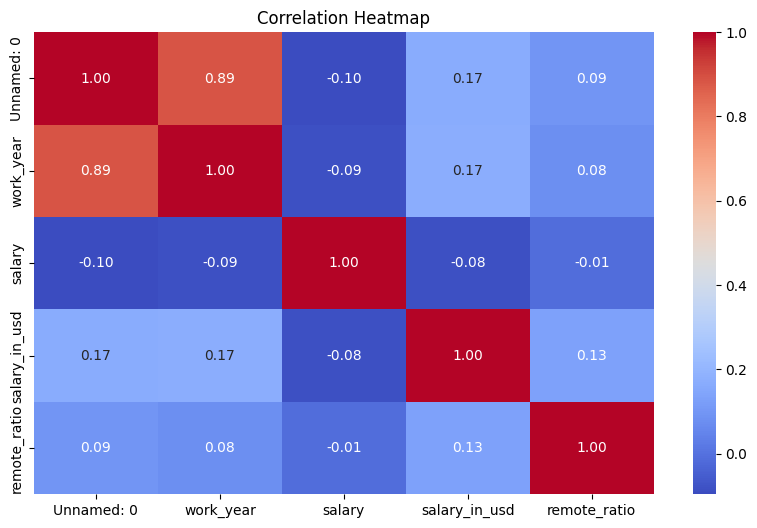

In [308]:
# Plot a heatmap for numeric columns to identify potential redundancy 
# Filter out only the numeric columns for correlation calculation
numeric_columns = data_science_jobs.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = data_science_jobs[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [309]:
#Inspecting the dataframe programmatically

In [310]:
# Check for unique values in all columns 
for column in data_science_jobs.columns:
    print(f"Unique values in '{column}' column:")
    print(data_science_jobs[column].unique())
    print("-" * 50)

Unique values in 'Unnamed: 0' column:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [311]:
# Check column names for consistency (no leading/trailing spaces, appropriate names)
print("Column names:")
print(data_science_jobs.columns)

Column names:
Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


**Data Tidiness Issue and justification for Dataset 2:**

1. Unnecessary Column: Unnamed: 0
    * Issue: The Unnamed: 0 column appears to be an index column that is not useful for analysis. It doesn't contribute any meaningful data for analysis or modeling.
    * Justification: This column should be removed as it doesn't provide relevant information for the analysis and can be considered redundant.
2. Multiple salary Columns:
    * Issue: The dataset contains both salary and salary_in_usd columns. These columns represent the same data (salary, just in different currencies or units).
    * Justification: The redundancy between salary and salary_in_usd can lead to confusion and unnecessary complexity. One of these columns should be removed to avoid duplication and ensure clarity. The most logical choice is to retain salary_in_usd as it is standardized.
3. Inconsistent Job Titles:
    * Issue: The job_title column contains job titles that may not represent standardized career titles. For instance, titles like "3D Computer Vision Researcher" or "Machine Learning Developer" may not be considered as common or typical data science roles.
    * Justification: This inconsistency makes it difficult to categorize or group similar job roles for analysis. Job titles should be standardized or categorized into broader job families such as Data Scientist, Machine Learning Engineer, Data Analyst, etc. This will enable easier aggregation and comparison of roles across the dataset.
4. Unnecessary employment_type Column Categories:
    * Issue: The employment_type column contains values like FT, CT, PT, and FL. While these may be valid job types, the FL category (possibly standing for "Freelance") could potentially be categorized under CT (Contract).
    * Justification: Consolidating employment types into clearer categories would reduce redundancy and improve the clarity of job role analysis.
5. Numerical Values in remote_ration Column:
    * Issue: The remote_ratio column contains numerical values (e.g., 0, 50, 100) representing the percentage of remote work.
    * Justification: This column is fine in its current form, but if there is a need to convert it into categories (Remote, Hybrid, In-office), that would enhance interpretability.
6. Job Titles with Possible Duplicates or Variants:
    * Issue: The dataset includes titles like "Machine Learning Engineer" and "Lead Machine Learning Engineer," which could be grouped together for simplification. Titles like "Data Science Manager" and "Head of Data Science" may overlap.
    * Justification: Some job titles can be merged or standardized to improve data consistency and help with aggregation for analysis.



# 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. 

## Make copies of the datasets 

This ensures the raw dataframes are not impacted when we begin to clean them.

Making a copy ensures that:

   * The original data remains untouched.
   * You can revert to the raw data at any time without reloading it.
   * You can create multiple versions for different analyses.


In [312]:
# Make a copy of the jobs_data Dataframe
jobs_copy = jobs_data.copy()

#Make a copy of the data_science_jobs Dataframe
data_copy = data_science_jobs.copy()

In [313]:
# printing to verify copies

print("Origional jops_data Dataframe:")
print(jobs_copy.head(2))

print("Origional data_science_jobs Dataframe:")
print(data_copy.head(2))

Origional jops_data Dataframe:
   work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
Origional data_science_jobs Dataframe:
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   7

### Clean Quality Issue For Dataset 1: 

In [314]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Print new range
    print(f"New '{column}' range after removing outliers: {filtered_df[column].min()} to {filtered_df[column].max()}")
    
    return filtered_df

# Apply the function and view the updated range for 'salary_in_usd'
jobs_copy = remove_outliers(jobs_copy, 'salary_in_usd')

New 'salary_in_usd' range after removing outliers: 15000 to 308000


In [315]:
# Check distribution of work_setting
print(jobs_copy['work_setting'].value_counts())

work_setting
In-person    5606
Remote       3403
Hybrid        188
Name: count, dtype: int64


In [316]:
# List unique job categories
print(jobs_copy['job_category'].unique())

['Data Engineering' 'Data Architecture and Modeling'
 'Data Science and Research' 'Machine Learning and AI' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Quality and Operations' 'Data Management and Strategy'
 'Cloud and Database']


In [317]:
print(jobs_copy['job_title'].unique())

['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Research Engineer' 'Data Lead' 'Data Management Specialist'
 'AI Architect' 'Data Science Manager' '

In [318]:
# Removing Irrelevant data/columns
jobs_copy = jobs_copy.drop(columns=['work_year','job_title','salary','salary_currency','employee_residence'])

# Verify current columns
print("Remaining column names after irrelevant data was dropped:")
print(jobs_copy.columns)

Remaining column names after irrelevant data was dropped:
Index(['job_category', 'salary_in_usd', 'experience_level', 'employment_type',
       'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [319]:
# Double check duplicates
print(f"Duplicate rows before removal: {jobs_copy.duplicated().sum()}")

Duplicate rows before removal: 4722


In [320]:
# Remove duplicates
jobs_copy = jobs_copy.drop_duplicates()

# Verify
print(f"Duplicate rows after removal: {jobs_copy.duplicated().sum()}")

Duplicate rows after removal: 0


In [321]:
# Filter jobs_copy to only include rows where company_location is 'United States'
# since I am  US residence and will only be looking for jobs within the states all other countries are irrelevant
jobs_copy = jobs_copy[jobs_copy['company_location'] == 'United States']

#verify that only 'United States' remains in the company_location column
print(jobs_copy['company_location'].unique())


['United States']


In [322]:
# Validate the cleaning was successful
print(f"Cleaned dataset 1 for Quality Issues: {jobs_copy.head()}")


Cleaned dataset 1 for Quality Issues:                      job_category  salary_in_usd experience_level  \
1  Data Architecture and Modeling         186000           Senior   
2  Data Architecture and Modeling          81800           Senior   
3       Data Science and Research         212000           Senior   
4       Data Science and Research          93300           Senior   
5       Data Science and Research         130000           Senior   

  employment_type work_setting company_location company_size  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M  
5       Full-time       Remote    United States            M  


**Dataset 1, Cleaning for Quality Issues**  

1. Handling Outliers in salary columns
    * Stragegy: Remove rows where salary_in_usd exceeds 300,000
    * Justification: Outliers can skew statistical measures such as the mean, median, and standard deviation, which may affect the insights derived from the data. By removing extreme outliers, we ensure a more representative salary range for analysis.
2. Potential Misclassification in job_category
    * Strategy: Ensure unique values are consistent and logically grouped.
    * Justification: Misclassification can skew job demand insights. By reviewing and ensuring accurate categories, we maintain data validity and improve the overall analysis.
3. Removing Irrelevant Data
    * Strategy: Filter the dataset to include only U.S.-based data.
      Drop Columns that are not needed for the analysis (such as work_year, job_title, salary, salary_currency, and employee_residence). 
    * Justification: Filtering to focus on U.S. salary data, international data from other countries is irrelevant and introduces unnecessary noise that could dilute the findings.
      Dropping unnecessary columns ensures the dataset is focused on relevant features, which simplifies further analysis and avoids clutter.
4. Removing Duplicate Data
    * Stragegy: Ensure duplicate rows are removed.
    * Justification: Duplicate rows inflate the dataset size and can skew statistical analysis, affecting any insights derived from the dataset. Removing duplicates ensures data accuracy.

### **Clean Tidiness Issue for Dataset 1:**

In [323]:
# Rename the job_category column to jobs to prepare it for merging with second dataset

# Rename job_category to jobs
jobs_copy = jobs_copy.rename(columns={'job_category': 'jobs'})

# Verify the column name change
print(jobs_copy.columns)

Index(['jobs', 'salary_in_usd', 'experience_level', 'employment_type',
       'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [324]:
# See if we need to clean anything else
jobs_copy.head(10)

,jobs,salary_in_usd,experience_level,employment_type,work_setting,company_location,company_size
1,Data Architecture and Modeling,186000,Senior,Full-time,In-person,United States,M
2,Data Architecture and Modeling,81800,Senior,Full-time,In-person,United States,M
3,Data Science and Research,212000,Senior,Full-time,In-person,United States,M
4,Data Science and Research,93300,Senior,Full-time,In-person,United States,M
5,Data Science and Research,130000,Senior,Full-time,Remote,United States,M
6,Data Science and Research,100000,Senior,Full-time,Remote,United States,M
7,Machine Learning and AI,224400,Mid-level,Full-time,In-person,United States,M
8,Machine Learning and AI,138700,Mid-level,Full-time,In-person,United States,M
9,Data Engineering,210000,Executive,Full-time,Remote,United States,M
10,Data Engineering,168000,Executive,Full-time,Remote,United States,M


**Dataset 1, Justification for Cleaning Tidiness Issues:**

* Rename colums:
    * Issue: Inconsistent column names between datasets will cause issues during merging.
    * Justification:Standardizing the column names across both datasets ensures consistency, making the merging process smoother and preventing potential mismatches.    
* Handling missing values:
    * Issue: Missing values could distort any analysis, particularly when calculating averages or performing aggregations.
    * Justification: After inspecting the dataset, no missing values were found. Therefore, no further steps were needed to handle missing data. This ensures that the analysis is based on complete records.
* General Data Tidiness Improvements:
    * Consistency in column names: Ensuring column names are consistent, clear, and concise allows for easier reference and improves overall data readability.
    * Consolidation of similar data: Merging or dropping redundant columns, this simplification reduces complexity and makes the dataset easier to work with for analysis.

### **Save a copy of cleaned Dataset 1:**

### **Clean Quality Issue for Dataset 2:**

In [325]:
# Check the basic statistics for salary_in_usd
print(data_copy['salary_in_usd'].describe())

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


In [326]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # Print new range
    print(f"New '{column}' range after removing outliers: {filtered_df[column].min()} to {filtered_df[column].max()}")
    
    return filtered_df

# Apply the function and view the updated range for 'salary_in_usd'
data_copy = remove_outliers(data_copy, 'salary_in_usd')

New 'salary_in_usd' range after removing outliers: 2859 to 276000


In [327]:
# Verify columns names
print("Origional Column Names:")
print(data_copy.columns)

Origional Column Names:
Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [328]:
# Removing Irrelevant data/columns
data_copy = data_copy.drop(columns=['Unnamed: 0', 'work_year', 'salary', 'salary_currency', 'employee_residence'])

# Verify current columns
print("Remaining column names after irrelevant data was dropped:")
print(data_copy.columns)

Remaining column names after irrelevant data was dropped:
Index(['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [329]:
print(data_copy['job_title'].unique())

['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Research Scientist' 'Machine Learning Manager'
 'Data Engineering Manager' 'Machine Learning Infrastructure Engineer'
 'ML Engineer' 'AI Scientist' 'Computer Vision Engineer'
 'Principal Data Scientist' 'Data Science Manager' 'Head of Data'
 '3D Computer Vision Researcher' 'Data Analytics Engineer'
 'Applied Data Scientist' 'Director of Data Science'
 'Marketing Data Analyst' 'Cloud Data Engineer'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Finance Data Analyst' 'Principal Data Anal

In [330]:
#Group similare job titles into categories to reduce number of unique titles

# Define mappings for job titles
job_title_mapping = {
    # Data Engineering
    'Big Data Engineer': 'Data Engineering',
    'Data Analytics Engineer': 'Data Engineering',
    'Principal Data Engineer': 'Data Engineering',
    'Data Engineer': 'Data Engineering',
    'Lead Data Engineer': 'Data Engineering',
    'Director of Data Engineering': 'Data Engineering',
    
    # Data Architecture and Modeling
    'Data Science Consultant': 'Data Architecture and Modeling',
    'Data Architect': 'Data Architecture and Modeling',
    'Big Data Architect': 'Data Architecture and Modeling',
    'ETL Developer': 'Data Architecture and Modeling',
    
    # Computer Vision
    'Computer Vision Software Engineer': 'Computer Vision',
    '3D Computer Vision Researcher': 'Computer Vision',
    'Computer Vision Engineer': 'Computer Vision',
    
    # Data Science and Research
    'Research Scientist': 'Data Science and Research',
    'Applied Data Scientist': 'Data Science and Research',
    'Data Science Engineer': 'Data Science and Research',
    'Head of Data Science': 'Data Science and Research',
    'Staff Data Scientist': 'Data Science and Research',
    'Lead Data Scientist': 'Data Science and Research',
    'Director of Data Science': 'Data Science and Research',
    'Principal Data Scientist': 'Data Science and Research',
    
    # Machine Learning and AI
    'Machine Learning Scientist': 'Machine Learning and AI',
    'Machine Learning Engineer': 'Machine Learning and AI',
    'Machine Learning Infrastructure Engineer': 'Machine Learning and AI',
    'ML Engineer': 'Machine Learning and AI',
    'AI Scientist': 'Machine Learning and AI',
    'Machine Learning Developer': 'Machine Learning and AI',
    'Head of Machine Learning': 'Machine Learning and AI',
    'NLP Engineer': 'Machine Learning and AI',
    'Lead Machine Learning Engineer': 'Machine Learning and AI',
    'Applied Machine Learning Scientist': 'Machine Learning and AI',
    
    # Data Analysis
    'Product Data Analyst': 'Data Analysis',
    'Data Analyst': 'Data Analysis',
    'Marketing Data Analyst': 'Data Analysis',
    'Finance Data Analyst': 'Data Analysis',
    'Data Analytics Lead': 'Data Analysis',
    'Principal Data Analyst': 'Data Analysis',
    'Lead Data Analyst': 'Data Analysis',
    'Financial Data Analyst': 'Data Analysis',
    'Analytics Engineer': 'Data Analysis',
    
    # Leadership and Management
    'Data Engineering Manager': 'Leadership and Management',
    'Machine Learning Manager': 'Leadership and Management',
    'Data Analytics Manager': 'Leadership and Management',
    'Data Science Manager': 'Leadership and Management',
    
    # BI and Visualization
    'Business Data Analyst': 'BI and Visualization',
    'BI Data Analyst': 'BI and Visualization',
    
    # Data Quality and Operations
    'Head of Data': 'Data Quality and Operations',
    
    # Data Management and Strategy
    'Data Specialist': 'Data Management and Strategy',
    
    # Cloud and Database
    'Cloud Data Engineer': 'Cloud and Database'
}

# Apply the job title mapping
data_copy['job_title'] = data_copy['job_title'].replace(job_title_mapping)

# Verify the changes
print("Unique values in job_title after standardization:")
print(data_copy['job_title'].unique())

Unique values in job_title after standardization:
['Data Scientist' 'Machine Learning and AI' 'Data Engineering'
 'Data Analysis' 'Data Science and Research' 'BI and Visualization'
 'Data Architecture and Modeling' 'Leadership and Management'
 'Computer Vision' 'Data Quality and Operations' 'Cloud and Database'
 'Data Management and Strategy']


**Dataset 2, Quality Cleaning Justification:**
1. Outliers in the salary_in_usd Column:
    * Issue:The salary_in_usd column contained extreme outliers, where some salary values were significantly higher than the typical range.
    * Justification:  Outliers can distort the analysis and interpretation of salary trends. By removing the outliers, we ensured that the analysis reflects more typical salary trends and avoids skewed insights.
2. Dopped Non-useful Columns: 
    * Issue: The dataset contained columns such as Unnamed: 0, work_year, salary_currency, salary, and employee_residence, which were unnecessary for our analysis. These columns either contained irrelevant information or did not add value to the specific analysis we were performing.
    * Removing non-useful columns reduces data clutter, improving performance during analysis and ensuring that we only focus on relevant features. This also prevents potential confusion or misinterpretation of irrelevant columns.
3. Group Similar Data
    * Issue: The dataset contained too many unique values within the job_title column, making it difficult to analyze and interpret.
    * Justification: Grouping similar job titles into broader categories helps reduce the number of unique entries, making the dataset cleaner and easier to work with. This standardization improves readability and ensures consistency, as it consolidates related job titles into meaningful groups. For example, titles like "Big Data Engineer" and "Data Analytics Engineer" were merged under the broader category "Data Engineering," which provides a more structured and interpretable view of the data.
4. Merging Job Titles:
    * Issue: The 'job_title' column contained multiple variations of the same roles ("Machine Learning Engineer" and "ML Engineer").
    * Justification: Standardizing job titles ensures consistency in the dataset and improves analysis by grouping similar roles under a single label. By merging related job titles, it eliminates confusion and makes the dataset more manageable.


### **Clean Tidiness Issue for Dataset 2:**

In [331]:
# Double Check unique values in 'experience_level' and 'employment_type' columns in data_copy
print("Unique values in 'experience_level' column:")
print(data_copy['experience_level'].unique())

print("Unique values in 'employment_type' column:")
print(data_copy['employment_type'].unique())

Unique values in 'experience_level' column:
['MI' 'SE' 'EN' 'EX']
Unique values in 'employment_type' column:
['FT' 'CT' 'PT' 'FL']


In [332]:
# Make values align with values from dataset 1

# Define mappings for standardization
# mapping for employment_type
employment_type_mapping = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}
# mapping for experience_level
experience_level_mapping = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior',
    'EX': 'Executive'
}

# mapping for remote_ratio
remote_ratio_mapping = {
    0: 'In-person',
    50: 'Hybrid',
    100: 'Remote'
}

# Apply the mappings to the 'employment_type', 'experience_level', and 'remote_ratio' columns
data_copy['employment_type'] = data_copy['employment_type'].replace(employment_type_mapping)
data_copy['experience_level'] = data_copy['experience_level'].replace(experience_level_mapping)
data_copy['remote_ratio'] = data_copy['remote_ratio'].replace(remote_ratio_mapping)

# Verify the changes
print("Unique values in employment_type after standardization:")
print(data_copy['employment_type'].unique())

print("\nUnique values in experience_level after standardization:")
print(data_copy['experience_level'].unique())

print("\nUnique values in remote_ratio after standardization:")
print(data_copy['remote_ratio'].unique())

Unique values in employment_type after standardization:
['Full-time' 'Contract' 'Part-time' 'Freelance']

Unique values in experience_level after standardization:
['Mid-level' 'Senior' 'Entry-level' 'Executive']

Unique values in remote_ratio after standardization:
['In-person' 'Hybrid' 'Remote']


In [333]:
# Rename the column 'remote_ratio' to 'work_setting'
data_copy = data_copy.rename(columns={'remote_ratio': 'work_setting'})

# Verify the change
print("Updated column names:")
print(data_copy.columns)

Updated column names:
Index(['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
       'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [334]:
# Rename the 'job_title' column to 'jobs'
data_copy = data_copy.rename(columns={'job_title': 'jobs'})

# Verify the column name change
print(data_copy.columns)

Index(['experience_level', 'employment_type', 'jobs', 'salary_in_usd',
       'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [335]:
data_copy.head(10)

,experience_level,employment_type,jobs,salary_in_usd,work_setting,company_location,company_size
0,Mid-level,Full-time,Data Scientist,79833,In-person,DE,L
1,Senior,Full-time,Machine Learning and AI,260000,In-person,JP,S
2,Senior,Full-time,Data Engineering,109024,Hybrid,GB,M
3,Mid-level,Full-time,Data Analysis,20000,In-person,HN,S
4,Senior,Full-time,Machine Learning and AI,150000,Hybrid,US,L
5,Entry-level,Full-time,Data Analysis,72000,Remote,US,L
6,Senior,Full-time,Data Science and Research,190000,Remote,US,S
7,Mid-level,Full-time,Data Scientist,35735,Hybrid,HU,L
8,Mid-level,Full-time,BI and Visualization,135000,Remote,US,L
9,Senior,Full-time,Data Engineering,125000,Hybrid,NZ,S


In [340]:
jobs_copy.head(10)

,jobs,salary_in_usd,experience_level,employment_type,work_setting,company_location,company_size
1,Data Architecture and Modeling,186000,Senior,Full-time,In-person,United States,M
2,Data Architecture and Modeling,81800,Senior,Full-time,In-person,United States,M
3,Data Science and Research,212000,Senior,Full-time,In-person,United States,M
4,Data Science and Research,93300,Senior,Full-time,In-person,United States,M
5,Data Science and Research,130000,Senior,Full-time,Remote,United States,M
6,Data Science and Research,100000,Senior,Full-time,Remote,United States,M
7,Machine Learning and AI,224400,Mid-level,Full-time,In-person,United States,M
8,Machine Learning and AI,138700,Mid-level,Full-time,In-person,United States,M
9,Data Engineering,210000,Executive,Full-time,Remote,United States,M
10,Data Engineering,168000,Executive,Full-time,Remote,United States,M


**Dataset 2, Justification for Cleaning Tidiness Issues:**


1. Mapping and Standardizing Data:
    * Issue: Issue: The remote_ratio column contained numeric values (0, 50, 100) that represented different than in dataset 1 but needed to be converted into more interpretable categorical labels, such as 'In-person', 'Hybrid', and 'Remote'. Similarly, the employment_type column contained shorthand abbreviations ('FT' for Full-time) that required expansion into full terms. The experience_level column also used shorthand ('EN' for Entry-level), which was mapped to full words for clarity.
    * Justification: Mapping numeric values to descriptive categories improved the interpretability of the dataset, particularly when analyzing work settings. This transformation made the remote_ratio column more meaningful and aligned the data with easier-to-understand labels. Standardizing the employment_type and experience_level columns to full words also enhanced the dataset’s consistency and readability.
2. Renaming Columns:
    * Issue: The remote_ratio column was renamed to work_setting to align with the corresponding column in Dataset 1. Additionally, the job_title column was renamed to jobs to ensure consistency across both datasets.
    * Justification: Renaming the columns ensures uniformity between the two datasets, which is essential for efficient data merging and analysis. Consistent column names help maintain data integrity and prevent confusion during the analysis process.     
    
3. General Data Tidiness Improvements:
    * Standardizing categorical data such as work settings and job titles ensures consistent and reliable analysis, improving the accuracy of insights and the clarity of visualizations.
    * Simplification of Data Structure: By merging job titles into broader categories and dropping unnecessary columns, the dataset became more focused and easier to navigate. This reduced complexity without sacrificing valuable information, making the data more manageable.
    * Improved Data Usability: The tidiness improvements enhanced the overall usability of the dataset, enabling more accurate analysis and actionable insights. This also contributes to clearer visualizations and more straightforward interpretation.


### **Save a copy of cleaned Dataset 1:**


In [342]:
# Create folder for cleaned datasets

os.makedirs('cleaned_data', exist_ok=True)

In [ ]:
# Save both datasets in a folder named 'cleaned_data'

jobs_copy.to_csv('cleaned_data/jobs_copy_cleaned.csv', index=False, encoding='utf-8')
data_copy.to_csv('cleaned_data/data_copy_cleaned.csv', index=False, encoding='utf-8')

### **Combine datasets**


In [343]:
# Perform an outer join to merge the two cleaned dataframes

merged_data_jobs = pd.merge(data_copy, jobs_copy, how='outer')

#view first 10 rows of the merged dataset
merged_data_jobs.head(10)

,experience_level,employment_type,jobs,salary_in_usd,work_setting,company_location,company_size
0,Mid-level,Full-time,Data Scientist,79833,In-person,DE,L
1,Senior,Full-time,Machine Learning and AI,260000,In-person,JP,S
2,Senior,Full-time,Data Engineering,109024,Hybrid,GB,M
3,Mid-level,Full-time,Data Analysis,20000,In-person,HN,S
4,Senior,Full-time,Machine Learning and AI,150000,Hybrid,US,L
5,Entry-level,Full-time,Data Analysis,72000,Remote,US,L
6,Senior,Full-time,Data Science and Research,190000,Remote,US,S
7,Mid-level,Full-time,Data Scientist,35735,Hybrid,HU,L
8,Mid-level,Full-time,BI and Visualization,135000,Remote,US,L
9,Senior,Full-time,Data Engineering,125000,Hybrid,NZ,S


### **Save merged datasets**


In [344]:
# save merged dataset 'merged_data_jobs'

merged_data_jobs.to_csv('merged_data_jobs.csv', index=False, encoding='utf-8')

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

## Research questions

What job has the most entry level positions?

What job offers the most appealing average wage? What is the min and max for that same job?

What job offers the most remote positions?

*Research question:* FILL IN from answer to Step 1

In [346]:
# group data by job_title to count the number of job listing

job_counts = merged_data_jobs['jobs'].value_counts()

#print counts
print(job_counts)

jobs
Data Science and Research         1036
Data Engineering                   935
Data Analysis                      677
Machine Learning and AI            579
Leadership and Management          278
BI and Visualization               160
Data Architecture and Modeling     144
Data Scientist                     142
Data Management and Strategy        45
Data Quality and Operations         43
Computer Vision                     10
Cloud and Database                   7
Name: count, dtype: int64


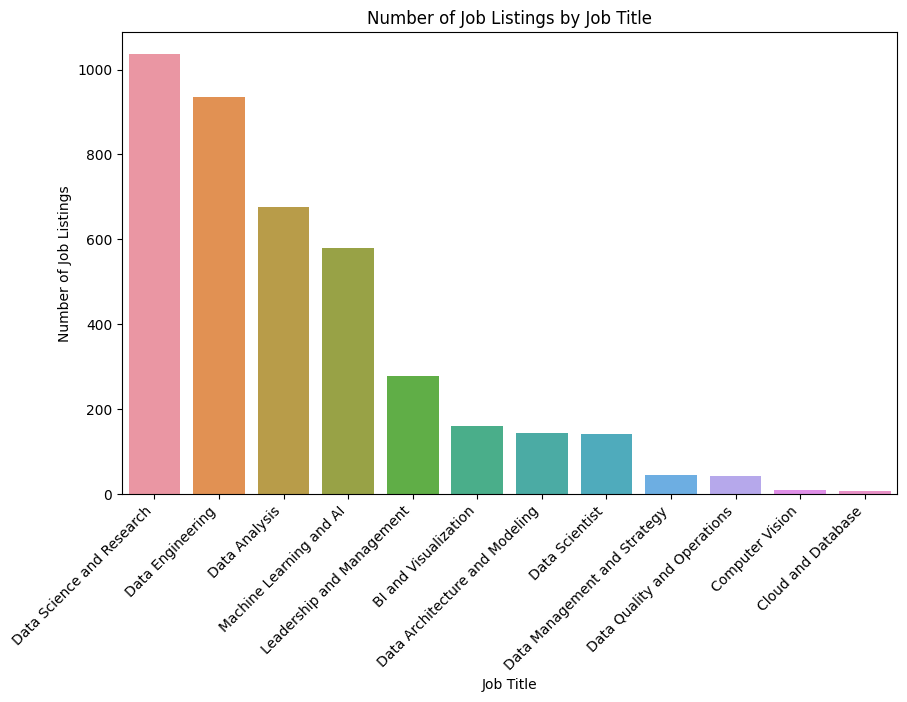

In [350]:
# Count the number of job listings for each job title
job_counts = merged_data_jobs['jobs'].value_counts().reset_index()

# Rename the columns for better readability
job_counts.columns = ['Job Title', 'Number of Job Listings']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Job Title', y='Number of Job Listings', data=job_counts)
plt.title('Number of Job Listings by Job Title')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.show()

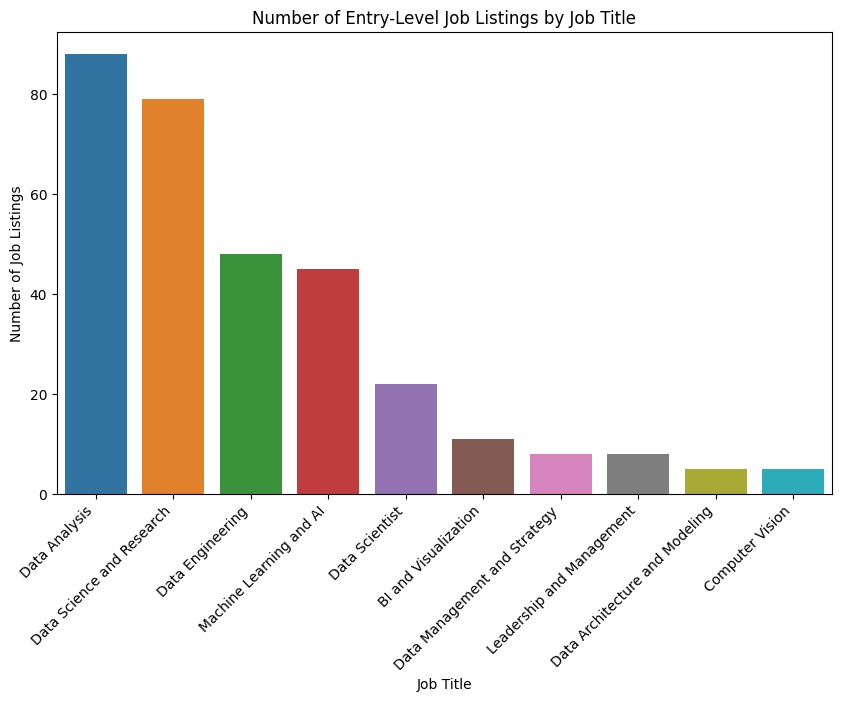

In [351]:
# Filter the dataset to only include entry-level jobs
entry_level_jobs = merged_data_jobs[merged_data_jobs['experience_level'] == 'Entry-level']

# Count job listings for entry-level jobs
job_counts_entry_level = entry_level_jobs['jobs'].value_counts()

# Convert the counts to a DataFrame
job_counts_entry_level_df = job_counts_entry_level.reset_index()
job_counts_entry_level_df.columns = ['Job Title', 'Number of Job Listings']  # Rename columns

# Plot the bar chart for entry-level jobs
plt.figure(figsize=(10, 6))
sns.barplot(x='Job Title', y='Number of Job Listings', data=job_counts_entry_level_df)
plt.title('Number of Entry-Level Job Listings by Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

**Answer:** 
###### What job has the most entry level positions??

I began my analysis by plotting a graph to visualize the total number of job listings for each job type. This initial step provided a clear overview of which roles had the highest demand across the industry. From this, I observed that Data Analysis had the most listings, followed by Data Science, Data Engineering, and Machine Learning and AI. While other job types were present, their listings were significantly lower in comparison.


To refine my focus, I filtered the data further to specifically look at entry-level positions within these roles. Once again, Data Analysis emerged as the leader in job availability, followed by Data Science, Data Engineering, and Machine Learning and AI. Given that these top four roles show a clear concentration of opportunities, I decided to narrow my research to these areas, as they not only represent the most accessible entry points but also provide a solid foundation for long-term career growth in data-related fields.

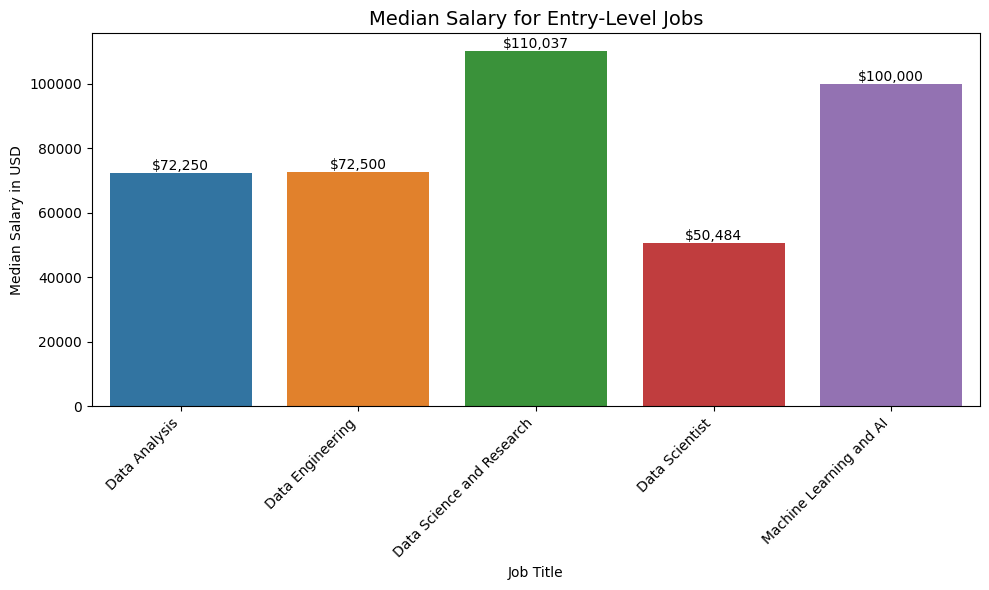

In [358]:
# List of job titles to include
job_titles_to_include = ['Data Analysis', 'Data Engineering', 'Data Science and Research', 
                         'Data Scientist', 'Machine Learning and AI']

# Filter for entry-level jobs and the specified job titles
entry_level_jobs_filtered = merged_data_jobs[(merged_data_jobs['experience_level'] == 'Entry-level') & 
                                             (merged_data_jobs['jobs'].isin(job_titles_to_include))]

# Calculate the median salary for the filtered entry-level jobs
median_salary_entry_level = entry_level_jobs_filtered.groupby('jobs')['salary_in_usd'].median().reset_index()

# Plot the comparison using a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='jobs', y='salary_in_usd', data=median_salary_entry_level)

# Add title and labels
plt.title('Median Salary for Entry-Level Jobs', fontsize=14)
plt.ylabel('Median Salary in USD')
plt.xlabel('Job Title')
plt.xticks(rotation=45, ha='right')

# Add value labels above each bar
for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}',  # Format as dollar amount
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [359]:
# List of job titles to include
job_titles_to_include = ['Data Analysis', 'Data Engineering', 'Data Science and Research', 
                         'Data Scientist', 'Machine Learning and AI']

# Filter the dataset for the specified job titles
filtered_jobs = merged_data_jobs[merged_data_jobs['jobs'].isin(job_titles_to_include)]

# Calculate the summary statistics
summary_stats = filtered_jobs.groupby('jobs')['salary_in_usd'].agg(
    Median='median',
    Minimum='min',
    Maximum='max'
).reset_index()

# Display the results
print(summary_stats)

                        jobs    Median  Minimum  Maximum
0              Data Analysis  106260.0     6072   280000
1           Data Engineering  142127.0     4000   305000
2  Data Science and Research  158300.0    20000   308000
3             Data Scientist  102895.5     2859   260000
4    Machine Learning and AI  171000.0    12000   305600


**Answer:** 
###### What job offers the most appealing average wage? What is the min and max for that same job?

As someone newly entering the data field, I focused on filtering for entry-level positions to gain a clearer understanding of starting opportunities. Among the roles analyzed, Data Science and Research offers the most appealing median salary at $110,000 USD, followed closely by Machine Learning and AI at 100,000 USD.


For Data Science and Research, the salary ranges from a minimum of 20,000 to a maximum of 308,000, while Machine Learning and AI positions have a slightly narrower range, with a minimum of 12,000 and a maximum of 305,600. Notably, Data Science and Research also features the highest maximum salary across all roles, likely reflecting senior-level positions.


This insight is encouraging, as it provides a benchmark for long-term career growth. Understanding these salary ranges helps set realistic short-term expectations and offers a glimpse into the potential rewards of progressing within these fields.

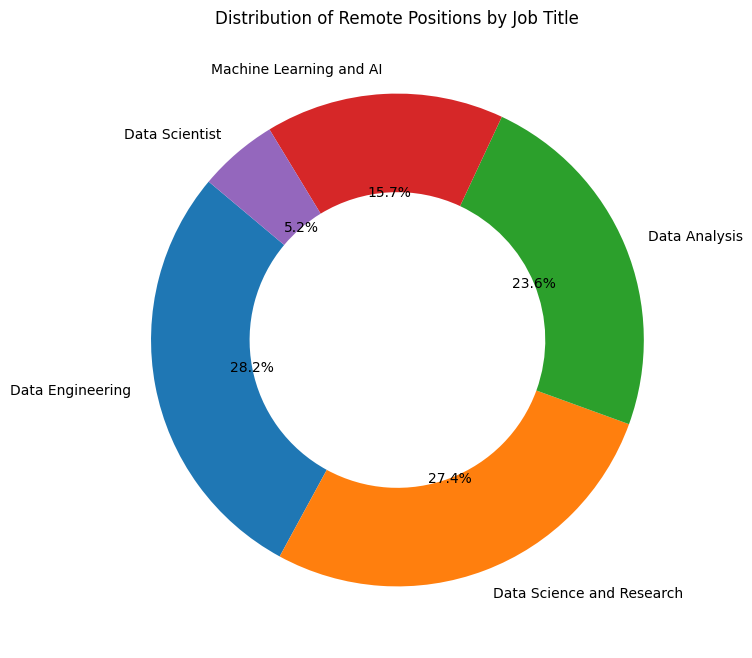

In [360]:
#just to try another type of chart I thought I would attempt a dounut chart

# Filter for the specified job titles
job_titles_to_include = ['Data Analysis', 'Data Engineering', 'Data Science and Research', 
                         'Data Scientist', 'Machine Learning and AI']

# Filter for remote jobs
remote_jobs = merged_data_jobs[merged_data_jobs['work_setting'] == 'Remote']
remote_job_counts = remote_jobs[remote_jobs['jobs'].isin(job_titles_to_include)]['jobs'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(remote_job_counts, labels=remote_job_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Distribution of Remote Positions by Job Title')
plt.show()

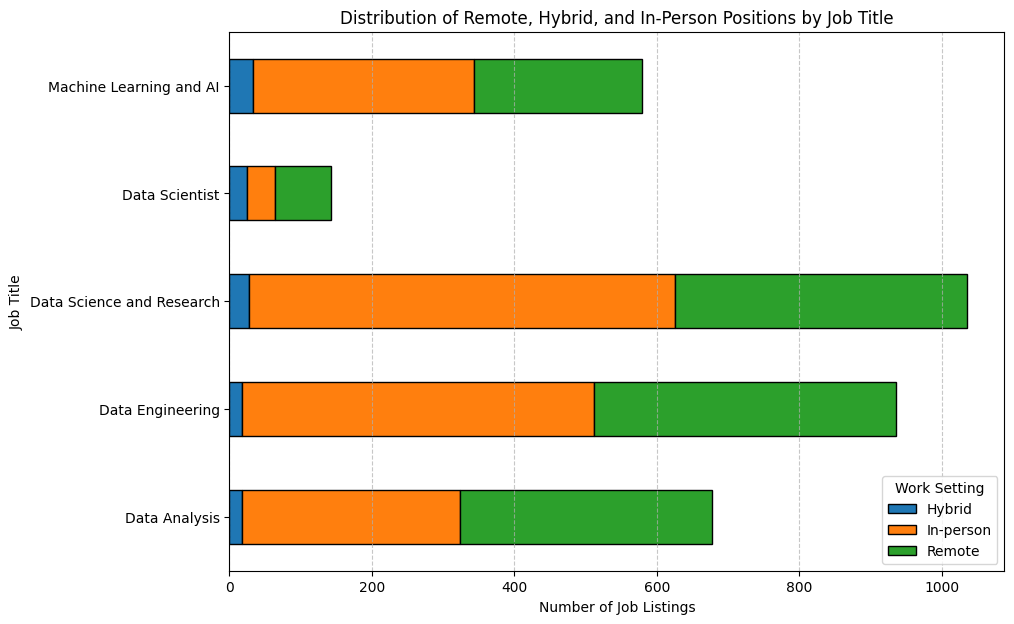

In [362]:
# Use a barh chart for the same information as the previous doughnut chart to see which view I preferred
# Filter for the specified job titles
job_titles_to_include = ['Data Analysis', 'Data Engineering', 'Data Science and Research', 
                         'Data Scientist', 'Machine Learning and AI']

# Filter for relevant jobs
filtered_jobs = merged_data_jobs[merged_data_jobs['jobs'].isin(job_titles_to_include)]

# Group by 'jobs' and 'work_setting', then count occurrences
work_setting_counts = filtered_jobs.groupby(['jobs', 'work_setting']).size().unstack(fill_value=0)

# Plot a stacked horizontal bar chart
work_setting_counts.plot(kind='barh', stacked=True, figsize=(10, 7), 
                         color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

plt.title('Distribution of Remote, Hybrid, and In-Person Positions by Job Title')
plt.xlabel('Number of Job Listings')
plt.ylabel('Job Title')
plt.legend(title='Work Setting', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Answer:** 
###### What job offers the most appealing average wage? What is the min and max for that same job?

In the data industry, remote work is prevalent across most roles, with a significant proportion of positions offering remote flexibility. Among the roles analyzed, Data Science and Research stands out as having the highest number of remote opportunities, followed by Data Engineering, Data Analysis, Machine Learning and AI, and finally Data Scientist roles.

Interestingly, while remote positions dominate, Data Science and Research also leads in the number of in-person job listings, indicating a more balanced distribution of work settings in that field. This suggests that while remote work is highly likely in any of these positions, specific roles like Data Science and Research may offer more diverse work environment options, catering to both those who prefer remote setups and those seeking in-person roles.



### **5.2:** Reflection


Choosing the right career path as an entry-level professional can be challenging, especially when considering multiple factors like salary, job demand, and work environment. My dream role would offer a remote work option with a salary around 100,000. However, as someone entering the data field with a Bachelor of Science in Data Analytics and limited professional experience from my current role as an AutoCAD/ISD drafter, I’m aware that many positions list prior experience as a preference.

Here’s a comparison of entry-level opportunities across five key roles:

**Data Analysis:**

   * Most job listings for entry-level positions.   
    
   * Median salary: 72,250    
    
   * Overall median salary: 106,000

   * Maximum salary: 280,000


**Data Science and Research:**

   * Second-highest entry-level job listings
   
   * Median salary: 110,000
   
   * Overall median salary: 158,000
   
   * Maximum salary: 308,000

**Data Engineering:**

   * Third in job demand.

   * Entry-level median salary: 72,500
   * Overall median salary: 142,000
   * Maximum salary: 305,000

**Machine Learning and AI:**

   * Fourth in job demand.
   
   * Entry-level median salary: 100,000
   
   * Overall median salary: 171,000
   
   * Maximum salary: 305,600


**Data Scientist:**

   * Fifth in job demand
   
   * Entry-level median salary: 50,000
   
   * Overall median salary: 102,000
   
   * Maximum salary: 260,000


Each role shows significant salary growth potential as experience is gained. Data Science and Research stands out with the highest median and maximum salaries, making it an attractive option for long-term growth. Meanwhile, Data Analysis provides a strong starting point with high job availability, which could offer more opportunities to get a foot in the door.

**FINAL PLOT!**

One final plot just to see if I can do it and so I can view Entry-Level positions with the median salary and work_setting, hopefully this will help guide my decision on what direction to specialize in.

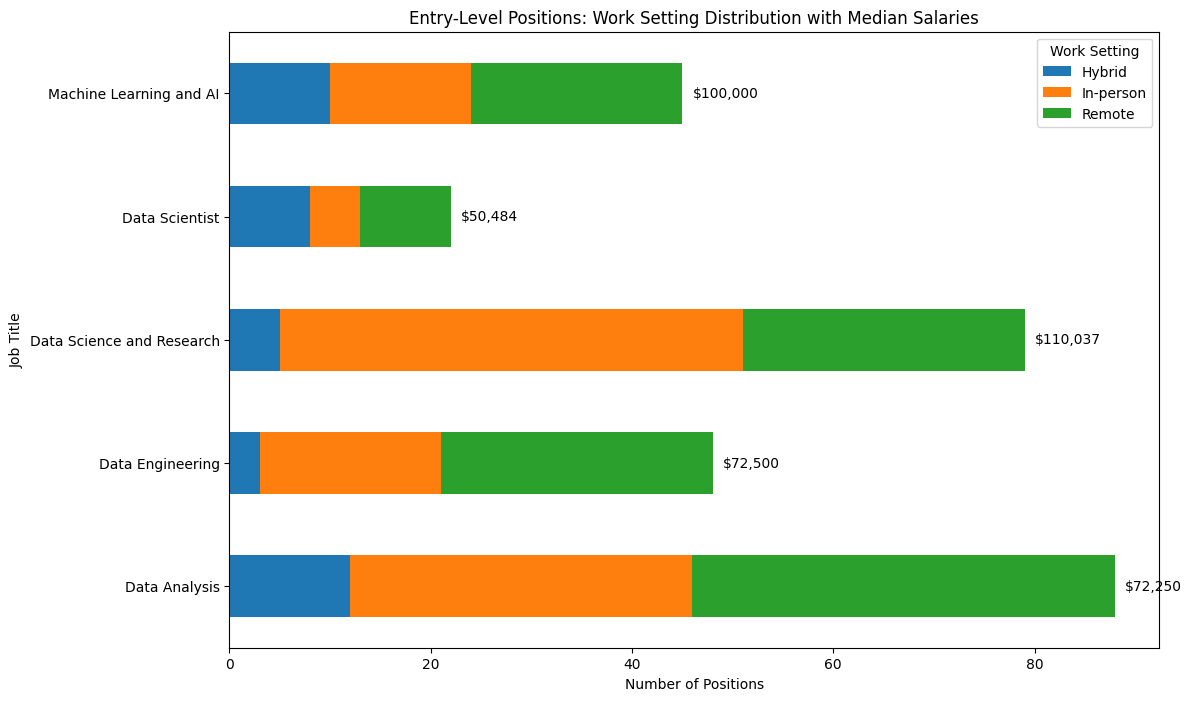

In [365]:
# Filter and prepare the data for the selected jobs
job_titles = ['Data Analysis', 'Data Engineering', 'Data Science and Research', 'Data Scientist', 'Machine Learning and AI']
filtered_data = merged_data_jobs[(merged_data_jobs['jobs'].isin(job_titles)) & 
                                 (merged_data_jobs['experience_level'] == 'Entry-level')]

# Group by jobs and work setting to count occurrences
work_setting_counts = filtered_data.groupby(['jobs', 'work_setting']).size().reset_index(name='count')

# Calculate median salary for each job
median_salaries = filtered_data.groupby('jobs')['salary_in_usd'].median().reset_index()

# Pivot the data for stacked bar chart
pivoted_data = work_setting_counts.pivot(index='jobs', columns='work_setting', values='count').fillna(0)

# Plot the stacked horizontal bar chart
ax = pivoted_data.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add salary annotations
for i, (job, salary) in enumerate(zip(median_salaries['jobs'], median_salaries['salary_in_usd'])):
    total_positions = pivoted_data.loc[job].sum()  # Total positions for each job
    ax.text(total_positions + 1, i, f'${salary:,.0f}', va='center', fontsize=10, color='black')

plt.title('Entry-Level Positions: Work Setting Distribution with Median Salaries')
plt.xlabel('Number of Positions')
plt.ylabel('Job Title')
plt.legend(title='Work Setting', loc='upper right')
plt.show()

**FINAL REFLECTION**

As I wrap up this project, I find myself reflecting on the journey. This project was both challenging and incredibly exciting. One of the most time-consuming aspects was choosing a topic then finding and deciding on the right dataset. If I had more time, I would have delved deeper into web scraping, gathering data from multiple sources to compile a comprehensive list of job listings, required experience, educational qualifications, and work settings. This would have allowed for a more robust analysis.

Another area I’d like to explore further is the classification of job titles. One challenge I faced was the inconsistency between the two datasets—job titles were listed differently, which made it difficult to categorize them accurately. With additional research, I could refine these classifications to ensure a more accurate analysis.

Overall, this project has been a tremendous learning experience. It not only helped me develop my data analysis skills but also provided valuable insights as I consider which path to take within the data industry. What made it even more meaningful was the opportunity to align a school project with my personal career goals, helping me narrow down my focus as I prepare to enter the field.